In [328]:
#Importing Libarires and importing the data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api  as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
bikes_data = pd.read_csv('day.csv')
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [329]:
#number of duplicate rows present in the data set
bikes_data.duplicated().sum()

0

In [330]:
#Dropping unnessary variables
# as instant is the index of the data set given 
bikes_data = bikes_data.drop('instant' , axis = 1)
#day , month and year already given in the data set given 
bikes_data = bikes_data.drop('dteday' , axis = 1)
#cnt is the count of the casual and registerd users and cnt is count of total rental bikes including both casual and registered
# which is our target variable

bikes_data = bikes_data.drop('casual' , axis = 1)
bikes_data = bikes_data.drop('registered' , axis = 1)
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [331]:
bikes_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


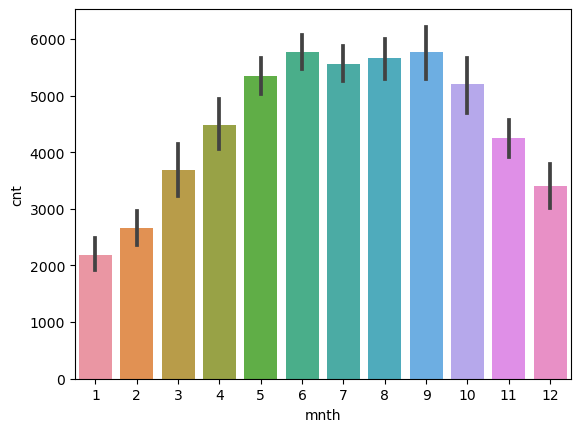

In [332]:
sns.barplot(x = 'mnth', y = 'cnt', data = bikes_data)
plt.show()
#here we can see that from june to september month the demand are quite high 

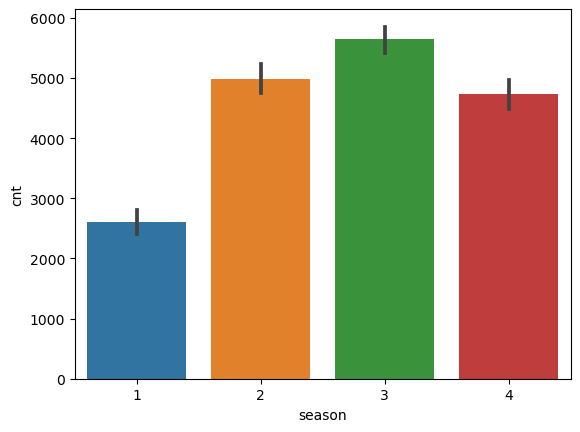

In [333]:
sns.barplot(x = 'season', y = 'cnt', data = bikes_data)
plt.show()
#Here we can see that demand for bikes is more during fall season followed by summer season

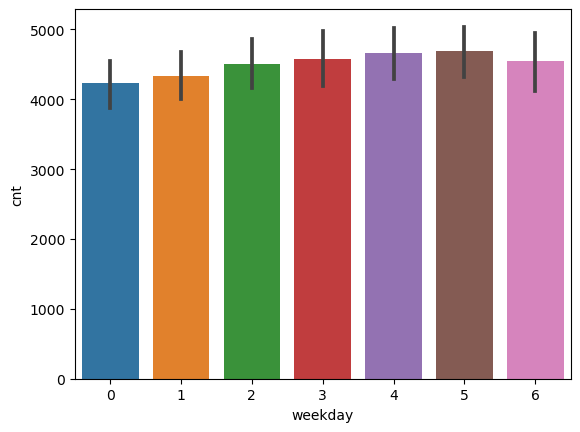

In [334]:
sns.barplot(x = 'weekday', y = 'cnt', data = bikes_data)
plt.show()

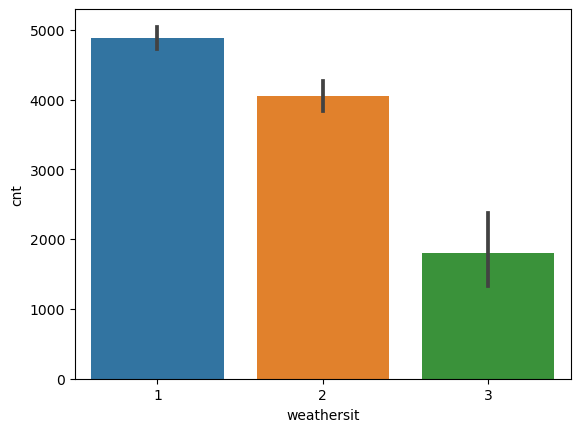

In [335]:
sns.barplot(x = 'weathersit', y = 'cnt', data = bikes_data)
plt.show()
# Here we can see that the demand for the bikes most on clear or few clouds day followed by mist weather 

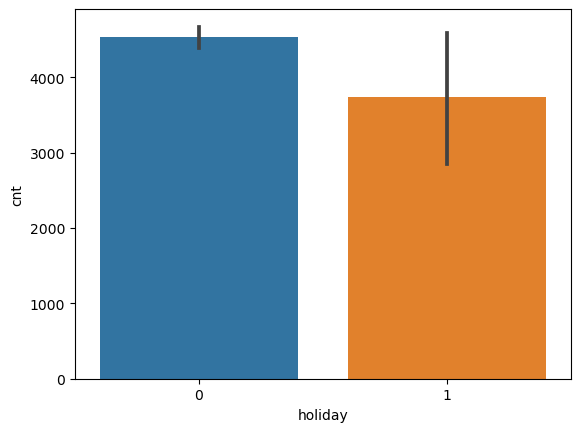

In [336]:
sns.barplot(x = 'holiday', y = 'cnt', data = bikes_data)
plt.show()

In [337]:
#Creating dummy variables for month
months_dummy = pd.get_dummies(bikes_data['mnth'] , drop_first = True)
bikes_data = pd.concat([bikes_data , months_dummy] , axis = 1)
bikes_data.rename(columns={2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}, inplace=True)

In [338]:
#Creating dummy variables for weathersit
weather_dummy = pd.get_dummies(bikes_data['weathersit'] , drop_first = True)
bikes_data = pd.concat([bikes_data , weather_dummy] , axis = 1)
bikes_data.rename(columns={2:"mist",3:"light_rain",4:"heavy_rain"}, inplace=True)
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  feb         730 non-null    uint8  
 13  mar         730 non-null    uint8  
 14  apr         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  jun         730 non-null    uint8  
 17  jul         730 non-null    uint8  
 18  aug         730 non-null    uint8  
 19  sep         730 non-null    u

In [339]:
#Creating dummy variables for season
season_dummy = pd.get_dummies(bikes_data['season'] , drop_first = True)
bikes_data = pd.concat([bikes_data , season_dummy] , axis = 1)
bikes_data.rename(columns={2:"summer",3:"fall",4:"winter"}, inplace=True)

In [340]:
#Creating dummy variables for week days
weekday_dummy = pd.get_dummies(bikes_data['weekday'] , drop_first = True)
bikes_data = pd.concat([bikes_data , weekday_dummy] , axis = 1)
bikes_data.rename(columns={1:"Mon",2:"Tue",3:"wed",4:"thu",5:"fri",6:"sat"}, inplace=True)
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  feb         730 non-null    uint8  
 13  mar         730 non-null    uint8  
 14  apr         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  jun         730 non-null    uint8  
 17  jul         730 non-null    uint8  
 18  aug         730 non-null    uint8  
 19  sep         730 non-null    u

In [341]:
#dropping the variables from which the dummy variables are created as they will be of no use 
bikes_data = bikes_data.drop('mnth' , axis = 1)
bikes_data = bikes_data.drop('weekday' , axis = 1)
bikes_data = bikes_data.drop('weathersit' , axis = 1)
bikes_data = bikes_data.drop('season' , axis = 1)
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   feb         730 non-null    uint8  
 9   mar         730 non-null    uint8  
 10  apr         730 non-null    uint8  
 11  may         730 non-null    uint8  
 12  jun         730 non-null    uint8  
 13  jul         730 non-null    uint8  
 14  aug         730 non-null    uint8  
 15  sep         730 non-null    uint8  
 16  oct         730 non-null    uint8  
 17  nov         730 non-null    uint8  
 18  dec         730 non-null    uint8  
 19  mist        730 non-null    u

In [342]:
sns.pairplot(bikes_data)
plt.show()

In [343]:
#temp and atemp are similar data therefore droping atemp variable
bikes_data = bikes_data.drop('atemp' , axis = 1)

In [344]:
bikes_data = bikes_data.astype(np.float64)
bikes_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,light_rain,summer,fall,winter,Mon,Tue,wed,thu,fri,sat
0,0.0,0.0,0.0,14.110847,80.5833,10.749882,985.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,14.902598,69.6087,16.652113,801.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,8.050924,43.7273,16.636703,1349.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,8.200000,59.0435,10.739832,1562.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,9.305237,43.6957,12.522300,1600.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [345]:
#splitting the data for training and testing
df_train , df_test = train_test_split(bikes_data , train_size = 0.7 , random_state = 100)

In [346]:
#list of vaiables that have numercial values
num_vars = [ 'temp' , 'hum' , 'windspeed' , 'cnt']

In [347]:
scaler = MinMaxScaler()

In [348]:
#tranforming the data so that evalution can be done properly
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [349]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,light_rain,summer,fall,winter,Mon,Tue,wed,thu,fri,sat
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.191095,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


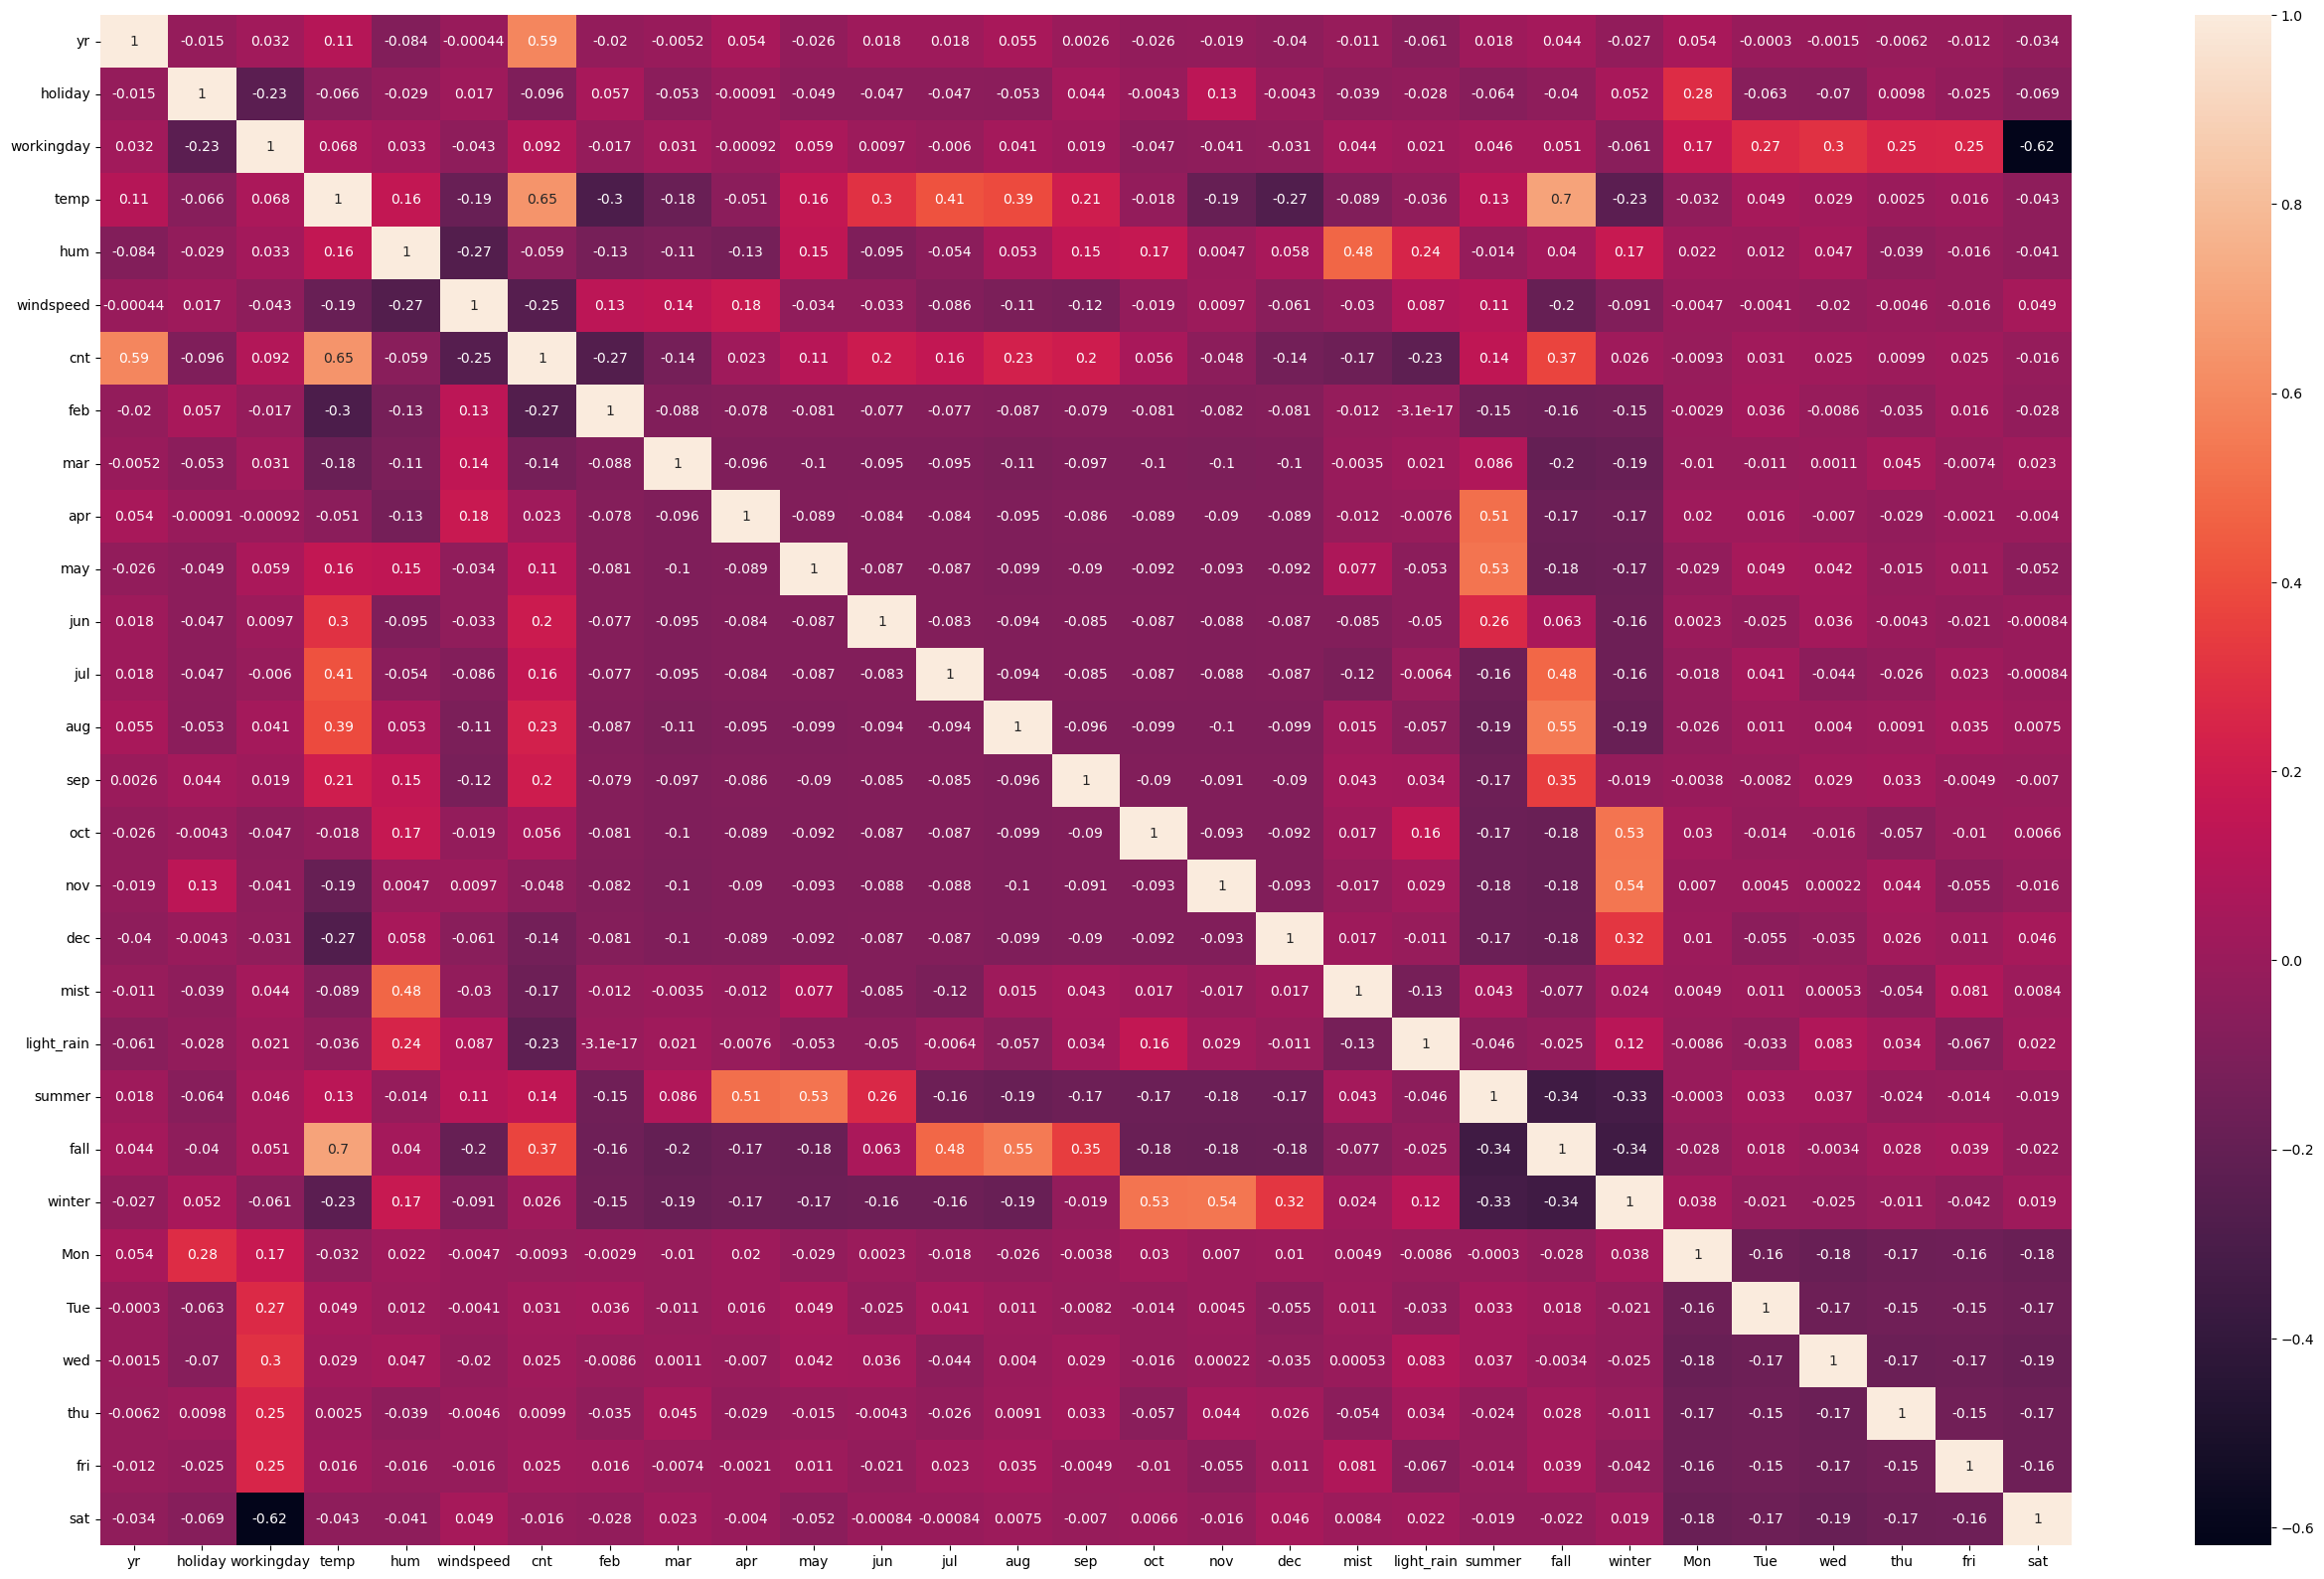

In [350]:
plt.figure(figsize = (32,20))
sns.heatmap(df_train.corr() , annot = True)
plt.show()

In [ ]:
#taking out the y value that is cnt which is the target variable 

In [351]:
y_train = df_train.pop('cnt')
X_train = df_train

In [352]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [353]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('feb', False, 7),
 ('mar', False, 3),
 ('apr', False, 5),
 ('may', False, 4),
 ('jun', False, 6),
 ('jul', False, 8),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 9),
 ('dec', False, 10),
 ('mist', True, 1),
 ('light_rain', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('wed', False, 14),
 ('thu', False, 15),
 ('fri', False, 13),
 ('sat', True, 1)]

In [354]:
# Selected columns for analysis
columns_analyse = X_train.columns[rfe.support_]
columns_analyse

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'aug', 'sep',
       'oct', 'mist', 'light_rain', 'summer', 'winter', 'sat'],
      dtype='object')

In [355]:
X_train_rfe = X_train[columns_analyse]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,aug,sep,oct,mist,light_rain,summer,winter,sat
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [356]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#summary of the model build
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          8.70e-192
Time:                        01:08:13   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
aug            0.0557      0.016      3.457      0.001       0.024       0.087
sep            0.1252      0.016      7.757      0.000       0.093       0.157
oct            0.0385      0.017      2.230      0.026       0.005       0.072
mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
light_rain    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
sat            0.0527      0.015      3.627      0.000       0.024       0.081
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
#Removing const variable to calcualte the VIF
X_train_rfe_new=X_train_rfe.copy()
X = X_train_rfe_new.drop('const',axis=1)
X.head()

,yr,holiday,workingday,temp,hum,windspeed,aug,sep,oct,mist,light_rain,summer,winter,sat
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [358]:
# Calculate the VIFs for the model created
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
12,winter,2.25
9,mist,2.14
0,yr,2.03
13,sat,1.90
11,summer,1.84
8,oct,1.61


In [359]:
#as VIF of hum is high and low p-value we will drop the hum variable 
X = X.drop('hum' , axis = 1)

# Adding a constant variable
X_updated = sm.add_constant(X)

# Running the linear model
lr=sm.OLS(y_train,X_updated).fit()

#summary of the model build
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          1.97e-188
Time:                        01:08:14   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.019      4.914      0.000       0.056       0.131
yr             0.2331      0.008     28.769      0.000       0.217       0.249
holiday       -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday     0.0473      0.012      4.026      0.000       0.024       0.070
temp           0.5106      0.022     23.229      0.000       0.467       0.554
windspeed     -0.1530      0.025     -6.183      0.000      -0.202      -0.104
aug            0.0539      0.016      3.281      0.001       0.022       0.086
sep            0.1185      0.016      7.226      0.000       0.086       0.151
oct            0.0343      0.018      1.950      0.052      -0.000       0.069
mist          -0.0840      0.009     -9.676      0.000      -0.101      -0.067
light_rain    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
summer         0.1019      0.011      9.325      0.000       0.080       0.123
winter         0.1267      0.012     10.524      0.000       0.103       0.150
sat            0.0578      0.015      3.912      0.000       0.029       0.087
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
# Calculate the VIFs for the model created
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
11,winter,2.00
10,summer,1.83
12,sat,1.77
7,oct,1.60
5,aug,1.59
8,mist,1.55


In [361]:
#dropping working day as it has high VIF value 
#we are dropping working day instead of temp because when dropping the temp which has the highest value 
# it accuracy of the model reduces significantly
X = X.drop('workingday' , axis = 1)

# Adding a constant variable
X_updated = sm.add_constant(X)

# Running the linear model
lr=sm.OLS(y_train,X_updated).fit()

#summary of the model build
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          3.73e-186
Time:                        01:08:14   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     497   BIC:                            -918.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1315      0.017      7.794      0.000       0.098       0.165
yr             0.2333      0.008     28.369      0.000       0.217       0.249
holiday       -0.0924      0.026     -3.536      0.000      -0.144      -0.041
temp           0.5112      0.022     22.907      0.000       0.467       0.555
windspeed     -0.1536      0.025     -6.117      0.000      -0.203      -0.104
aug            0.0562      0.017      3.369      0.001       0.023       0.089
sep            0.1205      0.017      7.239      0.000       0.088       0.153
oct            0.0312      0.018      1.750      0.081      -0.004       0.066
mist          -0.0820      0.009     -9.321      0.000      -0.099      -0.065
light_rain    -0.2874      0.025    -11.548      0.000      -0.336      -0.239
summer         0.1028      0.011      9.267      0.000       0.081       0.125
winter         0.1263      0.012     10.336      0.000       0.102       0.150
sat            0.0188      0.011      1.659      0.098      -0.003       0.041
==============================================================================
Omnibus:                       67.086   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.755
Skew:                          -0.719   Prob(JB):                     1.36e-32
Kurtosis:                       5.199   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
# Calculate the VIFs for the model created
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,3.18
0,yr,2.01
10,winter,1.94
9,summer,1.83
4,aug,1.59
6,oct,1.59
7,mist,1.49
5,sep,1.34
11,sat,1.18


In [365]:
#FInal MOdel
lm_final = lr
var_final = list(lm_final.params.index)

#Removing const variable to calculate the VIF
var_final.remove('const')
print('Final Selected Variables:', var_final)
lm_final.params

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'aug', 'sep', 'oct', 'mist', 'light_rain', 'summer', 'winter', 'sat']


const         0.131473
yr            0.233319
holiday      -0.092413
temp          0.511177
windspeed    -0.153637
aug           0.056186
sep           0.120472
oct           0.031221
mist         -0.082012
light_rain   -0.287414
summer        0.102776
winter        0.126290
sat           0.018799
dtype: float64

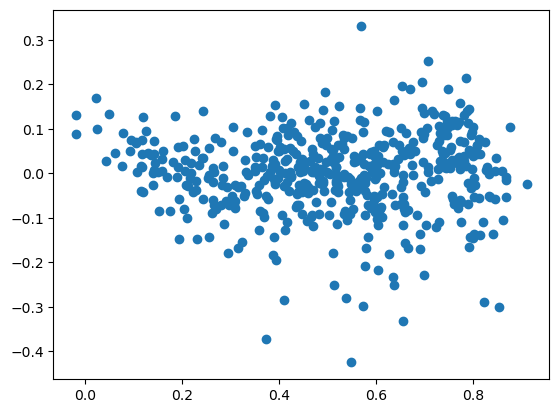

In [369]:
#Residual Analysis
y_train_pred = lm_final.predict(X_updated)
res = y_train - y_train_pred
plt.scatter(y_train_pred,res)
plt.show()

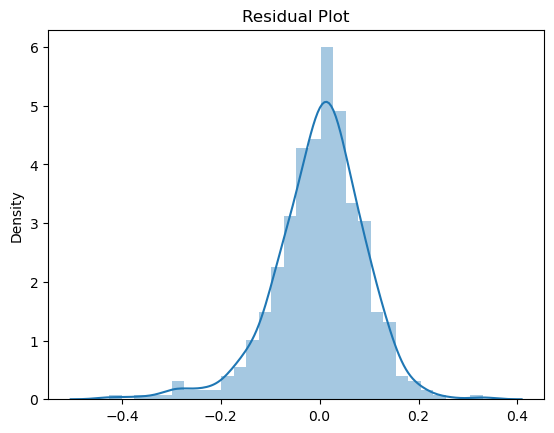

In [370]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

In [ ]:
# Testing the model build

In [373]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,light_rain,summer,fall,winter,Mon,Tue,wed,thu,fri,sat
184,0.0,1.0,0.0,29.793347,63.7917,5.459106,6043.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
535,1.0,0.0,1.0,32.082500,59.2083,7.625404,6211.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299,0.0,0.0,1.0,19.270000,81.2917,13.250121,2659.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
221,0.0,0.0,1.0,31.433347,42.4167,13.417286,4780.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152,0.0,0.0,1.0,29.315000,30.5000,19.583229,4968.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [374]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    float64
 1   holiday     220 non-null    float64
 2   workingday  220 non-null    float64
 3   temp        220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   cnt         220 non-null    float64
 7   feb         220 non-null    float64
 8   mar         220 non-null    float64
 9   apr         220 non-null    float64
 10  may         220 non-null    float64
 11  jun         220 non-null    float64
 12  jul         220 non-null    float64
 13  aug         220 non-null    float64
 14  sep         220 non-null    float64
 15  oct         220 non-null    float64
 16  nov         220 non-null    float64
 17  dec         220 non-null    float64
 18  mist        220 non-null    float64
 19  light_rain  220 non-null   

In [376]:
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [377]:
y_test = df_test.pop('cnt')
X_test = df_test

In [378]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,feb,mar,apr,may,...,light_rain,summer,fall,winter,Mon,Tue,wed,thu,fri,sat
184,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
535,1.0,0.0,1.0,0.901354,0.610133,0.153728,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299,0.0,0.0,1.0,0.511964,0.837699,0.334206,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
221,0.0,0.0,1.0,0.881625,0.437098,0.339570,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152,0.0,0.0,1.0,0.817246,0.314298,0.537414,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [379]:
X_test_new = X_test[var_final]
X_test_new.head()

,yr,holiday,temp,windspeed,aug,sep,oct,mist,light_rain,summer,winter,sat
184,0.0,1.0,0.831783,0.084219,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
535,1.0,0.0,0.901354,0.153728,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.0,0.0,0.511964,0.334206,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
221,0.0,0.0,0.881625,0.339570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.817246,0.537414,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [380]:
X_test_sm = sm.add_constant(X_test_new)

In [381]:
y_test_pred = lm_final.predict(X_test_sm)

In [382]:
#R-squared of the model build
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.8004087551134572

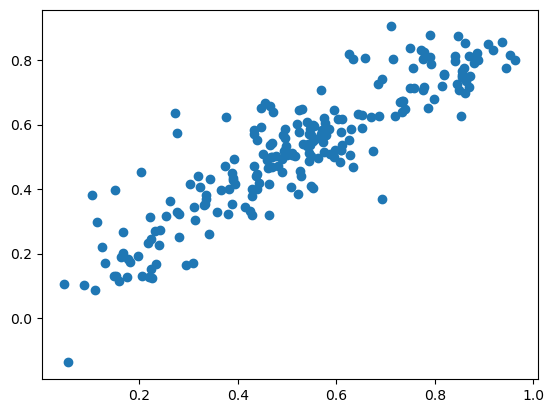

In [383]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.show()

In [ ]:
#THe model build is pretty accurate as we can see the linear line on the graph shown above